# Feature Reduction with PCA (Principal Component Analysis)

## OBJECTIVE

Feature Reduction (or dimension reduction) is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data. Principal component analysis (PCA) is a popular method for feature reduction.
 Principal component analysis (PCA) invented in 1901 by Karl Pearson is a statistical method that is to represent the data by an orthogonal transformation which can convert a set of features into a smaller set of values of linearly uncorrelated variables called principal components. The number of distinct principal components will be less than the number of original features. PCA is sensitive to data preprocessing like the relative scaling of the original features. The objective of this lab is to implement PCA algorithm for feature reduction.

## PREREQUISITES
Check the lecture slides Part II Module Data Pre processing ETL and be familiar with PCA algorithm below.
PCA Algorithm
- Step 1. Centralized the features
- Step 2. Calculate the covariance matrix of the centered features
- Step 3. Perform the eigen decomposition of the covariance matrix into respective eigenvectors and eigenvalues
- Step 4. Sort the eigenvalue and eigenvector pairs such that the eigenvalues are in descending order
- Step 5. Select top K eigenvectors
- Step 6. Construct KPCs

## INSTRUCTIONS
- Implement PCA algorithm with Python
- Test PCA on IRIS dataset by selecting first two PCs. The data can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.
- Plot the data with the two PCs.

In [2]:
import numpy as np

def pca(X, k):
    # Step 1: Center the features
    X_centered = X - np.mean(X, axis=0)
    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(X_centered.T)
    # Step 3: Perform eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # Step 4: Sort eigenvalue-eigenvector pairs
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    # Step 5: Select top K eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :k]
    # Step 6: Construct KPCs
    transformed_data = np.dot(X_centered, selected_eigenvectors)
    return transformed_data

# Test the implementation before applying to the dataset
# To show that PCA work, we generate a random dataset
np.random.seed(0)
X = np.random.rand(100, 5)

# Apply PCA with k=2
k = 2
transformed_data = pca(X, k)
print(transformed_data.shape)  # Prints (100, 2) - the transformed data with reduced dimensionality
print(transformed_data)

(100, 2)
[[ 0.12893433  0.00552079]
 [ 0.41533495 -0.00333602]
 [ 0.12969153  0.16412773]
 [ 0.24650397 -0.14045993]
 [ 0.16207752  0.14991566]
 [ 0.13934388 -0.43966464]
 [-0.20657412  0.29988263]
 [ 0.45644469  0.14116105]
 [-0.08338814 -0.44010773]
 [-0.40669395 -0.16223567]
 [-0.07822468 -0.54689644]
 [-0.32185981  0.27818679]
 [-0.46903245 -0.33884216]
 [-0.18252448  0.60959633]
 [ 0.56450686 -0.45829395]
 [-0.69934854  0.14949441]
 [-0.17969097  0.29630788]
 [-0.01618035  0.20430776]
 [-0.19010877  0.4347466 ]
 [-0.40382975  0.63300159]
 [ 0.2146383   0.01376866]
 [ 0.18764827 -0.34837748]
 [ 0.27028174 -0.18019686]
 [ 0.43661432  0.31189231]
 [ 0.35214634 -0.25370294]
 [-0.25545812 -0.05983647]
 [-0.25009409 -0.104749  ]
 [ 0.18077602 -0.0242288 ]
 [ 0.39337672 -0.03827965]
 [ 0.52569163 -0.45353413]
 [-0.29112861  0.53335385]
 [-0.02707699 -0.08058109]
 [ 0.59577797 -0.10937719]
 [-0.1815747  -0.12001143]
 [-0.39064285 -0.47455196]
 [-0.02370104  0.00207449]
 [ 0.08305672 -0.16

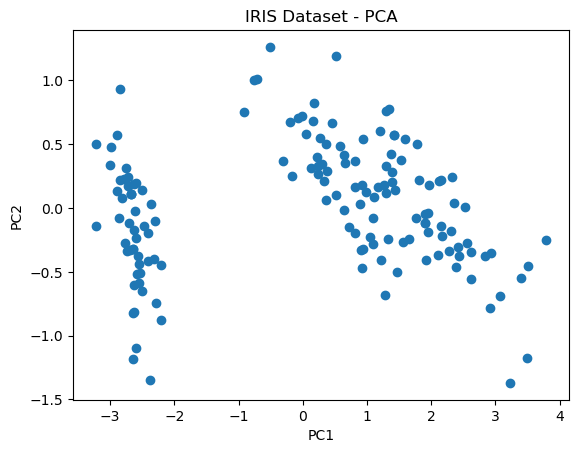

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset from a local file
file_path = "./datasets/iris.data"
data = pd.read_csv(file_path, header=None)
X = data.iloc[:, :-1].values  # Extract the features (columns 1-4)

# Apply PCA with k=2
k = 2
transformed_data = pca(X, k)

# Plot the data with the two principal components
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("IRIS Dataset - PCA")
plt.show()